# Exploring Netflix Titles: Trends and Insights

This notebook walks through loading, cleaning, exploring, and visualizing the **Netflix Titles** dataset.

In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
print('Libraries loaded!')

Libraries loaded!


In [2]:
# Load data
PATH = '../data/netflix_titles.csv'  # adjust if needed
df = pd.read_csv(PATH)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Quick explore
print(df.shape)
df.isna().sum()

(8807, 12)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# Basic cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Questions

In [8]:
import os
os.makedirs('../images', exist_ok=True)


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

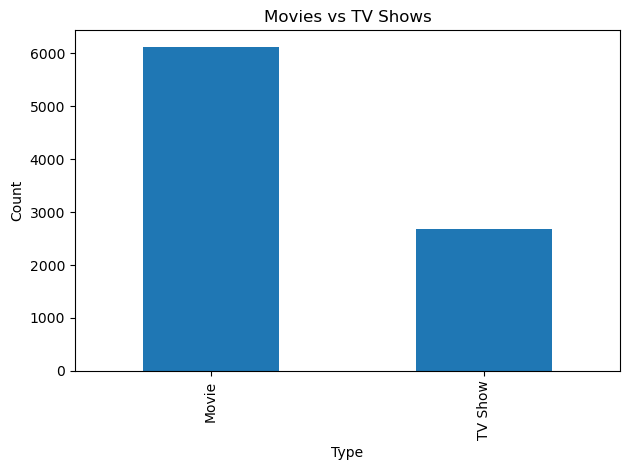

In [9]:
# 1) Movies vs TV Shows
counts = df['type'].value_counts(dropna=False)
ax = counts.plot(kind='bar', title='Movies vs TV Shows')
plt.xlabel('Type'); plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../images/movies_vs_tvshows.png', dpi=150)
counts

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64

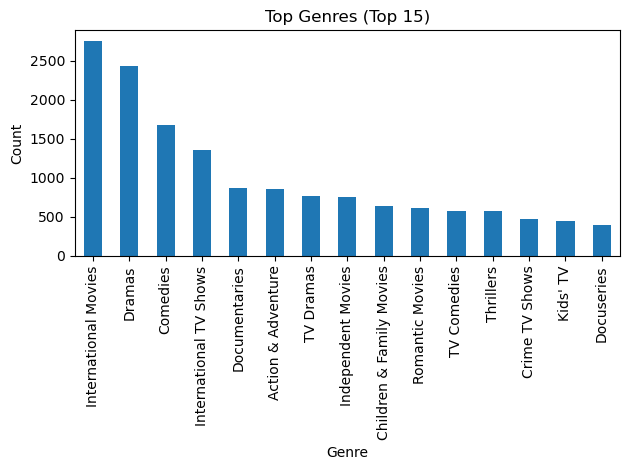

In [13]:
# 2) Top genres (from `listed_in`)
genres = (
    df.assign(listed_in=df['listed_in'].fillna(''))
      .assign(genre=df['listed_in'].str.split(', '))
      .explode('genre')
      .query("genre != ''")
)
top_genres = genres['genre'].value_counts().head(15)
ax = top_genres.plot(kind='bar', title='Top Genres (Top 15)')
plt.xlabel('Genre'); plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../images/top_genres.png', dpi=150)
top_genres

# Assistant
The error occurs because the code is trying to save a file to a directory that doesn't exist. The `FileNotFoundError` indicates that the path '../images/top_genres.png' is not valid because the 'images' directory doesn't exist in the parent directory.

Would you like me to provide the corrected code?

# User
yes

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64

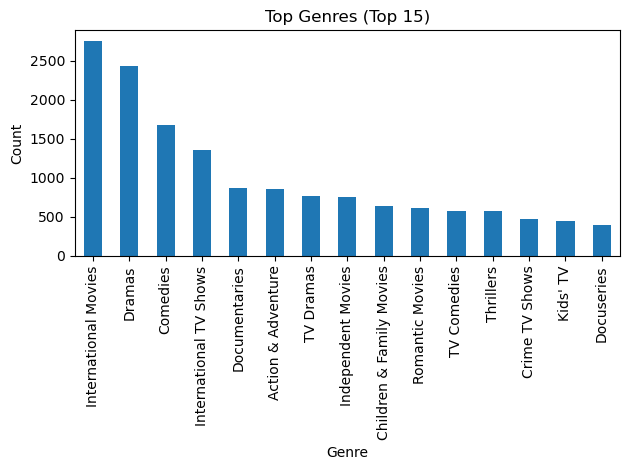

In [12]:
# Assistant
import os

# 2) Top genres (from `listed_in`)
genres = (
    df.assign(listed_in=df['listed_in'].fillna(''))
      .assign(genre=df['listed_in'].str.split(', '))
      .explode('genre')
      .query("genre != ''")
)
top_genres = genres['genre'].value_counts().head(15)
ax = top_genres.plot(kind='bar', title='Top Genres (Top 15)')
plt.xlabel('Genre'); plt.ylabel('Count')
plt.tight_layout()

# Create the images directory if it doesn't exist
os.makedirs('../images', exist_ok=True)

# Now save the figure
plt.savefig('../images/top_genres.png', dpi=150)
top_genres

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
dtype: int64

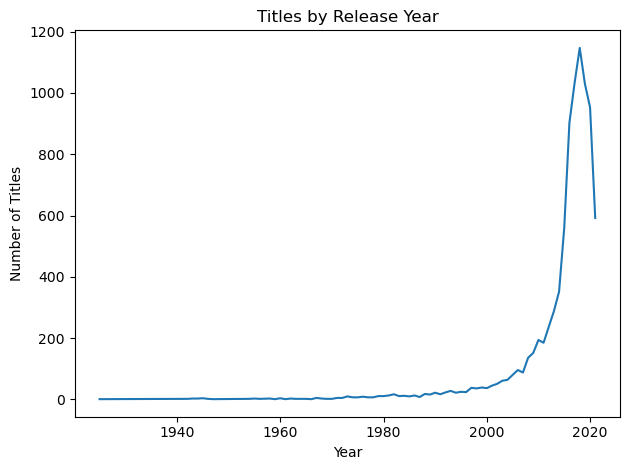

In [10]:
# 3) Content over time by release year
by_year = df.groupby('release_year').size().sort_index()
ax = by_year.plot(kind='line', title='Titles by Release Year')
plt.xlabel('Year'); plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('../images/titles_by_release_year.png', dpi=150)
by_year.tail(10)

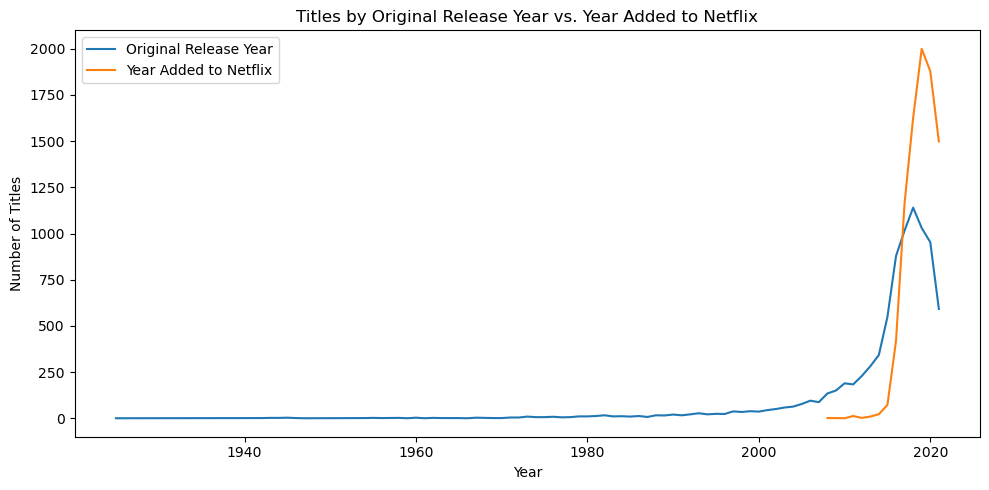

In [14]:
# Ensure images folder exists
import os
os.makedirs('../images', exist_ok=True)

# Prepare years
df2 = df.copy()
added_year = df2['date_added'].dt.year
release_year = df2['release_year']

# Reasonable bounds to avoid weird outliers
valid = (release_year.between(1900, 2025)) & (added_year.between(2008, 2025))
df2 = df2[valid]

# Counts by year
by_release = df2.groupby('release_year').size()
by_added   = df2.groupby(df2['date_added'].dt.year).size()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
by_release.sort_index().plot(label='Original Release Year')
by_added.sort_index().plot(label='Year Added to Netflix')
plt.title('Titles by Original Release Year vs. Year Added to Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.tight_layout()
plt.savefig('../images/release_vs_added_year.png', dpi=150)
plt.show()


Lag (years) — summary:
count    8709.00
mean        4.69
std         8.79
min        -3.00
25%         0.00
50%         1.00
75%         5.00
max        93.00
dtype: float64


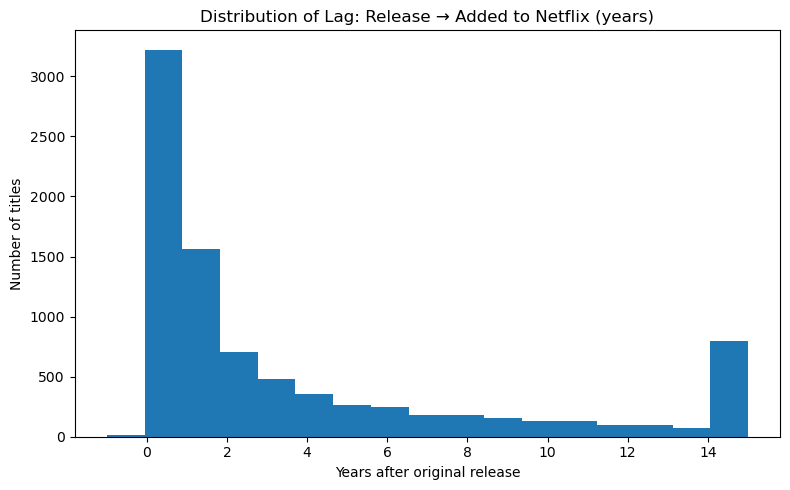

In [15]:
# Lag in years between original release and when it was added to Netflix
lag_years = (df2['date_added'].dt.year - df2['release_year']).dropna()

print('Lag (years) — summary:')
print(lag_years.describe().round(2))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
lag_years.clip(lower=-1, upper=15).plot(kind='hist', bins=17)  # trim extremes for readability
plt.title('Distribution of Lag: Release → Added to Netflix (years)')
plt.xlabel('Years after original release')
plt.ylabel('Number of titles')
plt.tight_layout()
plt.savefig('../images/lag_release_to_added_hist.png', dpi=150)
plt.show()


cc
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: count, dtype: int64

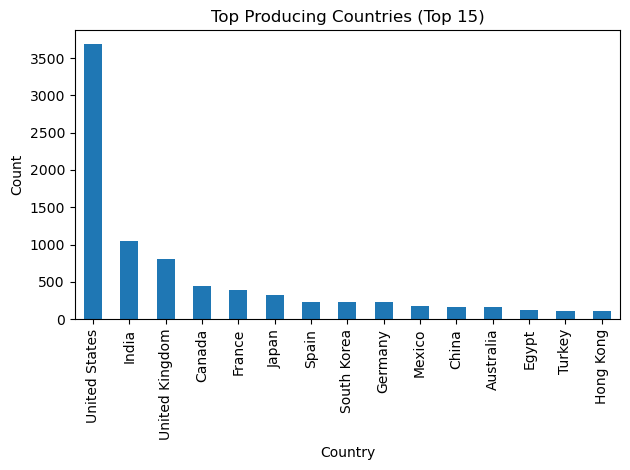

In [11]:
# 4) Top producing countries (using the `country` column)
countries = (
    df.assign(country=df['country'].fillna(''))
      .assign(cc=df['country'].str.split(', '))
      .explode('cc')
      .query("cc != ''")
)
top_countries = countries['cc'].value_counts().head(15)
ax = top_countries.plot(kind='bar', title='Top Producing Countries (Top 15)')
plt.xlabel('Country'); plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../images/top_countries.png', dpi=150)
top_countries

## Summary (fill in your insights)
- Add 3–5 bullets summarizing what you found.
- Example: "Movies are more common than TV Shows."

In [ ]:
Movies are more common than TV Shows.

In [ ]:
The least popular genre is docuseries.

In [ ]:
The most popular genre is international movies.

In [ ]:
The United states is the top producing country.

In [ ]:
Titles produced spiked from 2016 to 2018, then there is a decline due to both lag and the pandemic.

In [16]:
# Generates a markdown snippet with real numbers from your data
from textwrap import dedent

# Movies vs TV Shows
type_counts = df['type'].value_counts()
n_movies = int(type_counts.get('Movie', 0))
n_tv     = int(type_counts.get('TV Show', 0))
total    = n_movies + n_tv
p_movies = (n_movies/total*100) if total else 0

# Top countries (explode)
countries = (
    df.assign(country=df['country'].fillna(''))
      .assign(cc=lambda x: x['country'].str.split(', '))
      .explode('cc')
      .query("cc != ''")
)
top_c = countries['cc'].value_counts().head(3)

# Top genres (explode)
genres = (
    df.assign(listed_in=df['listed_in'].fillna(''))
      .assign(genre=lambda x: x['listed_in'].str.split(', '))
      .explode('genre')
      .query("genre != ''")
)
top_g = genres['genre'].value_counts().head(3)

# Release-year growth and peak
by_year = df.groupby('release_year').size().sort_index()
start = 2016
peak_year = int(by_year.loc[start:].idxmax())
peak_count = int(by_year.loc[start:].max())
start_count = int(by_year.get(start, 0))
growth_pct = ((peak_count - start_count) / start_count * 100) if start_count else 0

# Median lag
added_year = df['date_added'].dt.year
lag_years = (added_year - df['release_year']).dropna()
median_lag = lag_years.median() if not lag_years.empty else float('nan')

snippet = f"""
## 📝 One-sentence takeaway
Titles rise fast from 2016 and peak in {peak_year}; the later dip mostly reflects a ~{median_lag:.1f}-year add-to-Netflix lag and the 2020 slowdown.

## 🔎 Key Insights
- Movies make up **{p_movies:.0f}%** of titles (Movies: {n_movies:,}, TV Shows: {n_tv:,}).
- Top producing countries: **{', '.join([f'{k} ({v:,})' for k, v in top_c.items()])}**.
- Top genres: **{', '.join(top_g.index.tolist())}**.
- From 2016→{peak_year} titles grew **{growth_pct:.0f}%** (from {start_count:,} to {peak_count:,}).
"""
print(snippet)



## 📝 One-sentence takeaway
Titles rise fast from 2016 and peak in 2018; the later dip mostly reflects a ~1.0-year add-to-Netflix lag and the 2020 slowdown.

## 🔎 Key Insights
- Movies make up **70%** of titles (Movies: 6,131, TV Shows: 2,676).
- Top producing countries: **United States (3,689), India (1,046), United Kingdom (804)**.
- Top genres: **International Movies, Dramas, Comedies**.
- From 2016→2018 titles grew **27%** (from 902 to 1,147).

